## 실습 
전처리-EDA-결정나무까지. 직접해보기
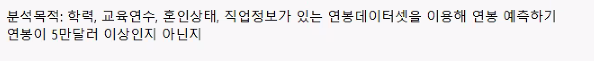
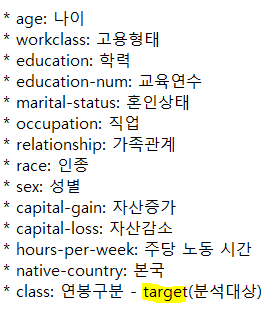
직접 해본 다음에는 배깅(결정나무와 다른개념)을 배울 예정

In [1]:
# 0. 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [102]:
pip install scikit-learn!

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.2 MB 6.7 MB/s eta 0:00:02
   ------------------------------ --------- 8.4/11.2 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.2 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 21.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [103]:
# 모델 학습
from sklearn.model_selection import train_test_split
# 결정나무
from sklearn.tree import DecisionTreeClassifier
# 평가 지표
from sklearn.metrics import accuracy_score,classification_report

In [2]:
#1. 데이터로딩
data = pd.read_csv("./data/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## flow
0. 필요한 라이브러리 로딩
1. 타이타닉 데이터 로딩
    - 헤드, 평균값, 중앙값 보면서 
    - 데이터타입이 이상한건 없는지
    - 수치형 중에 평균값과 중앙값 차이가 얼마나 나는지.
2. 데이터 전처리(2.1. 결측값처리, 2.2. 이상값탐지)
    - 결측값% 구하기 isna()
    - 비율크면 drop('지울컬럼',axis=1)
- 결측 비율이 약7%이고 삭제후 데이터분포에 편향을 주지않음
    - workclass 컬럼결측과 occupation결측
- 수치
    - fillna(해당컬럼 평균값)
- 범주
    - fillna(가장 빈도가 높은 값)
- 마친후 info로 결측없는지 체크<br>
2.2. 이상값 탐지
- plt.plot(kind='box')(전체컬럼 중 이상값 찾기)
    - data['컬럼'].describe()와 .value_counts()으로 진짜이상값인지 생각해보기.
    - 이상값 범위구하기 IQR이용 (describe에서 인덱싱)
    - 범위 벗어난 자료를 필터링 (클래스별로 Fare의 describe를 각각 구함)
    - 이상값 원인 파악
3. EDA - 탐색적 데이터분석: 각 컬럼의 데이터분포, 그래프로 확인,<br> 문자는 숫자로, 상관관계 확인
    - 범주형과 수치형 분리하여서 각각 담기
    - 컬럼들 구성을 파악하고 plot() 으로 그래프 보기
    - 그래도 파악이안되면(나이,가족) 히스토그램으로 구간차이가 드러나게 시각화.
4. Feature Enginnering( 변수 선택, 새로운 특성 생성, 카테고리 변수의 더미 변수화(one-hot encoding)
    - pd.cut 함수로 기존 컬럼에 숫자->글자(10대) 남기기*     
    - groupby연산으로 컬럼간 연관성 파악<br> 이때 평균(생존율) 때에 따라 적용.    
    - 불필요한 컬럼 drop
    - 남은 컬럼 one-hot인코딩 하고 다음단계로.

5. 최종 선택된 변수를 독립변수(X)와 종속변수(y)로 분리
    - X는 문제 y는 답
    - X에 들어가야할 df에는 문제(생존)컬럼만 빠짐.
    - y는 생존 (one-hot인코딩상태) 

6. 홀드아웃: sklearn의 train_test_split 통해서 train, test 세트로 분리
    - 분석 모델선택
![image.png](attachment:image.png)    
7. sklearn에서 DecisionTreeClassifier를 통해 모델 훈련
    - 데이터 셔플링을 할때 타겟이 차지하는 비율(해당칼럼안에서) 만큼 돌아갈수있게 지정해줘야함.stratify=y
8. test세트를 모델에 넣어서 예측값 생성 후 pred변수에 담기
9. accuracy_score(), classification_report()를 이용해 모델의 성능확인

**수많은 컬럼중에서 목적부합하는 변수들만 유지하는것**

In [3]:
#1. 전체 컬럼 수: 14
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [67]:
data['native-country'].describe()

count              47985
unique                41
top        United-States
freq               43832
Name: native-country, dtype: object

# 미국은보통 10~11년이 의무교육기간.

In [4]:
data.columns 
# 이중에4: 'education','education-num'.'marital-status','occupation'

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [5]:
# 교육연수
data['education-num'].describe()

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [6]:
# 혼인 상태
data['marital-status'].describe() # 중앙값 안나오는이유
data['marital-status'].value_counts() # 혼인 상태도 다양해서.얘도 14개 유니크

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

#### 결혼 상태 (marital-status) 항목 번역

| 원본 데이터               | 한국어 번역                | 설명 |
|---------------------------|-----------------------------|------|
| `Married-civ-spouse`      | 기혼 - 민간 결혼           | 일반적인 법적인 결혼 상태 (부부가 함께 사는 경우) |
| `Never-married`           | 미혼                       | 한 번도 결혼한 적 없음 |
| `Divorced`                | 이혼                       | 결혼했다가 법적으로 이혼함 |
| `Separated`               | 별거                       | 결혼은 했지만 현재 배우자와 떨어져 지내는 중 |
| `Widowed`                 | 사별                       | 배우자가 사망하여 혼자 된 상태 |
| `Married-spouse-absent`  | 기혼 - 배우자 부재         | 결혼은 했지만 배우자가 집을 떠나 장기간 연락이 없는 경우 등 |
| `Married-AF-spouse`       | 기혼 - 군 복무 중인 배우자 | 군 복무 중인 배우자와 결혼한 상태 (AF = Armed Forces) |


In [7]:
# 직업
data['occupation'].describe() # 중앙값 안나오는이유
data['occupation'].value_counts() # 얘도 14개 유니크

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

### 직업 (occupation) 항목 번역

| 원본 데이터            | 한국어 번역             | 설명 |
|------------------------|--------------------------|------|
| `Prof-specialty`       | 전문직                   | 교수, 과학자, 엔지니어, 의사 등 고등 교육을 요구하는 직업 |
| `Craft-repair`         | 기능공 및 수리공         | 목수, 전기공, 기계 수리공 등 기술 기반 수작업 |
| `Exec-managerial`      | 임원 및 관리자           | 기업의 관리자, 부장, 임원 등 |
| `Adm-clerical`         | 행정 및 사무직           | 사무보조, 데이터 입력, 비서 등 |
| `Sales`                | 영업직                   | 판매원, 매장 직원, 보험/부동산 판매 등 |
| `Other-service`        | 기타 서비스직            | 청소, 요리, 미용 등 기타 서비스 관련 직업 |
| `Machine-op-inspct`    | 기계 조작 및 검사직      | 생산 기계 조작, 공정 검사 등 |
| `Transport-moving`     | 운송 및 운전직           | 트럭 운전사, 배달원 등 운송 관련 직업 |
| `Handlers-cleaners`    | 물류 및 청소 담당        | 짐 나르기, 건물 청소 등 단순 작업 |
| `Farming-fishing`      | 농업 및 어업             | 농부, 어부 등 자연 자원 기반 직업 |
| `Tech-support`         | 기술 지원                | 컴퓨터, 네트워크 등 기술적 문제 해결 지원 |
| `Protective-serv`      | 보안/경비 관련           | 경찰, 소방관, 경비원 등 보호 서비스 관련 |
| `Priv-house-serv`      | 가사 서비스직            | 가정부, 육아 도우미 등 가정 내 서비스 |
| `Armed-Forces`         | 군인                     | 현역 군 복무 중인 사람 |


In [8]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

### 교육 수준 (education) 항목 번역

| 원본 데이터     | 한국어 번역        | 설명 |
|----------------|---------------------|------|
| `HS-grad`      | 고등학교 졸업       | 고등학교 학력 보유자 |
| `Some-college` | 대학교 중퇴 또는 재학 | 대학 졸업은 안 했지만 일정 학점 이수 |
| `Bachelors`    | 학사                | 대학교 졸업 (4년제) |
| `Masters`      | 석사                | 대학원 석사 졸업자 |
| `Assoc-voc`    | 전문대 졸업 (직업)  | 직업 교육 중심의 전문학사 (2~3년제) |
| `11th`         | 고등학교 2학년 수료 | 11학년, 고2 정도에 해당 |
| `Assoc-acdm`   | 전문대 졸업 (학문)  | 일반 학문 중심의 전문학사 |
| `10th`         | 고등학교 1학년 수료 | 10학년, 고1 정도에 해당 |
| `7th-8th`      | 중학교 1~2학년 수준 | 중학교 수준의 교육 |
| `Prof-school`  | 전문직 대학 졸업   | 의대, 법대 등 전문직 대학 졸업 |
| `9th`          | 중학교 3학년 수료   | 9학년, 중3 정도에 해당 |
| `12th`         | 고등학교 3학년 수료 | 고3까지 마쳤지만 졸업은 아님 |
| `Doctorate`    | 박사                | 박사 학위 소지자 |
| `5th-6th`      | 초등학교 고학년     | 5~6학년 수준 |
| `1st-4th`      | 초등학교 저학년     | 1~4학년 수준 |
| `Preschool`    | 유치원              | 정규 교육 시작 전 단계 |


# 중앙값은 못봤지만 결측값이 있는지 찍어봄


In [9]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [10]:
# 결측비율 확인 len쓰겠음
#len(data['workclass']) # 얘는 어차피 안쓸거긴한데..
len(data['occupation'])
#len(data['native-country'])


48842

In [104]:
data.isna().sum() / len(data) *100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
edu_times         0.000000
marry             0.000000
dtype: float64

In [11]:
# 직업의 결측률은 5퍼센트정도. 
2809/len(data['occupation'])*100

5.751197739650301

In [12]:
# 나머지 결측값있는 컬럼들도 문제되지는 않음.
2799/len(data['workclass'])*100

5.7307235575938735

# 이제 결측자리에 채울값 찾기
- 직업의 평균값? <br> 평균이되는직업을 찾아서 그걸로 대체
- 직업의 평균을 찾으려면?
- 직업은 범주형 이므로 가장 빈도가 높은 Prof-specialty가 대체값이 될것.

In [13]:
# 결측된 자리 index만 따로 담기
occu_na_idx=data[data['occupation'].isna()].index

In [14]:
data['occupation'].mode()

0     Prof-specialty
Name: occupation, dtype: object

In [15]:
data['occupation']= data['occupation'].fillna(data['occupation'].mode()[0])


In [16]:
# 결측된 내용 없음(1)
data.loc[occu_na_idx] 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,Prof-specialty,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [17]:
# isna 없는거 이렇게 찍으면 되나???
data['occupation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: occupation
Non-Null Count  Dtype 
--------------  ----- 
48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [18]:
# isna의 합이 0된점 확인
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

# 이상값 탐지하기


<Axes: >

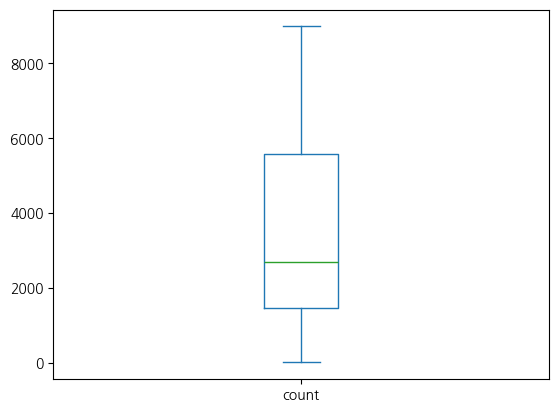

In [19]:
data['occupation'].value_counts().plot(kind='box')
# d0d 중앙값이 있긴하네??

<Axes: >

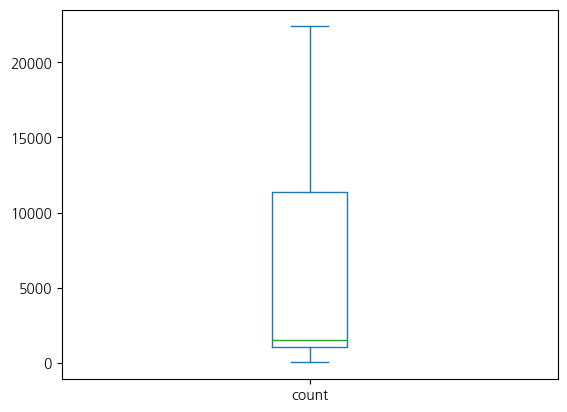

In [20]:
data['marital-status'].value_counts().plot(kind='box')
# d0d 중앙값이 계세요.

# ㅇ0ㅇ!!

<Axes: >

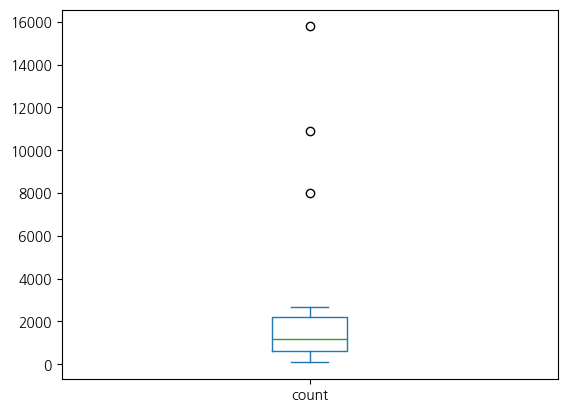

In [21]:
data['education-num'].value_counts().plot(kind='box')
# 교육연수에 갑자기 엄청 큰수가 있음 

<Axes: >

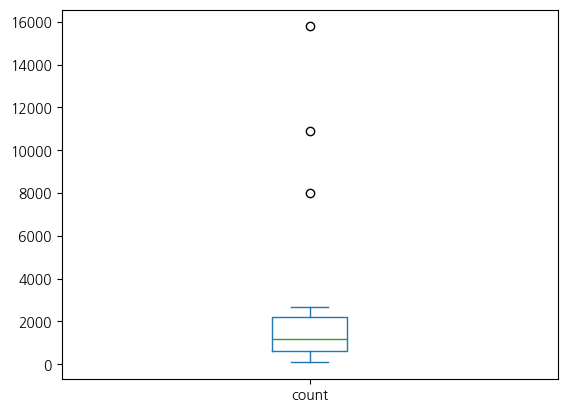

In [22]:
data['education'].value_counts().plot(kind='box')
# 학력에도에 갑자기 엄청 큰수가 있음 

# 이상값 범위부터 구하기

In [23]:
nedu_desc= data['education-num'].describe()
nedu_desc

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [24]:
maximum_nedu = nedu_desc.loc['75%'] + 1.5*(nedu_desc.loc['75%'] - nedu_desc.loc['75%'] )
maximum_nedu 

np.float64(12.0)

# 범위초과된 이상값들 모으기

In [31]:
outliers= data[data['education-num'] > maximum_nedu].sort_values(by='education-num',ascending=False)
outliers

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
48820,71,NaN,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,>50K
16301,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
133,42,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,41,United-States,>50K
48813,34,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
126,48,Federal-gov,Doctorate,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,37,Private,Bachelors,13,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,<=50K
188,34,State-gov,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,NaN,<=50K
190,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,40,United-States,>50K
191,39,Private,Bachelors,13,Separated,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,>50K


## 남편들?이 왜 교육기간이 길었는가.
일단 학력과의 연관성을 먼저 살펴보겠음
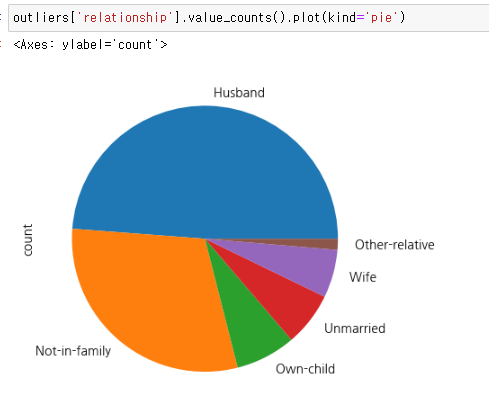

##### 관계 유형 (relationship) 항목 번역

| 원본 데이터       | 한국어 번역         | 설명 |
|------------------|----------------------|------|
| `Husband`        | 남편                 | 가구 내 가장이자 배우자 역할의 남성 |
| `Not-in-family`  | 가족 아님            | 혼자 거주하거나 하숙인, 친구 등 |
| `Own-child`      | 자녀                 | 자녀로서 등록된 가구 구성원 |
| `Unmarried`      | 미혼                 | 결혼하지 않았고 독립적인 상태 |
| `Wife`           | 아내                 | 가구 내 가장의 배우자인 여성 |
| `Other-relative` | 기타 친척            | 조부모, 삼촌, 사촌 등 기타 가족 |


In [30]:
data['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [46]:
data['edu_times']= pd.cut(data['education-num'],
       bins=[0,12,17], 
       labels=['under 12years','13~16'],
      right=False)

In [47]:
data[['edu_times','education']]

,edu_times,education
0,under 12years,11th
1,under 12years,HS-grad
2,13~16,Assoc-acdm
3,under 12years,Some-college
4,under 12years,Some-college
...,...,...
48837,13~16,Assoc-acdm
48838,under 12years,HS-grad
48839,under 12years,HS-grad
48840,under 12years,HS-grad


In [48]:
data[['edu_times','education']].describe()

,edu_times,education
count,48842,48842
unique,2,16
top,under 12years,HS-grad
freq,35131,15784


In [54]:
data[data['edu_times']=='13~16']

<Axes: ylabel='count'>

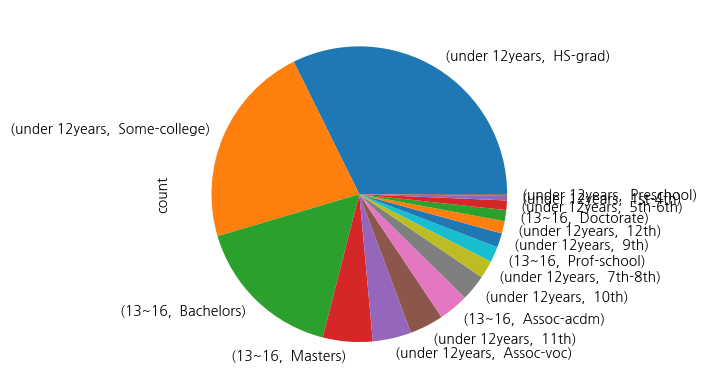

In [52]:
data[['edu_times','education']].value_counts().plot(kind='pie')

## nedu_max 는 12년 초과한 경우를 담음

In [73]:
# 직업이 무엇인지에 따라 교육기간과 소득이 달라질수있다고봄
# 지금 중요한건 기간이 12년 이상인 경우들이므로

nedu_max=data[data['edu_times']=='13~16']
nedu_max[['education','occupation']].describe()


,education,occupation
count,13711,13711
unique,5,14
top,Bachelors,Prof-specialty
freq,8025,5293


# prof-specialty는 전문직.
전문직을 준비하기위한 기간이 길지 않았나 판단됨.
# 따라서 이상값은 그대로 두기로?
16년정도는 무방하다고 보여짐 그대로 두기.<br>
다른 컬럼들 이상값 체크못했음

# 혼인상태를 one-hot으로 분류

# 범주와 수치를 분리하기.

In [74]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

## 싱글아님 not_s 따로 만들었으나

In [75]:
not_s=pd.get_dummies(data,columns=['marital-status'], drop_first=True)

In [87]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [105]:
data['marry']=data['marital-status'].astype('str')
data['marry'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Divorced',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

<Axes: ylabel='count'>

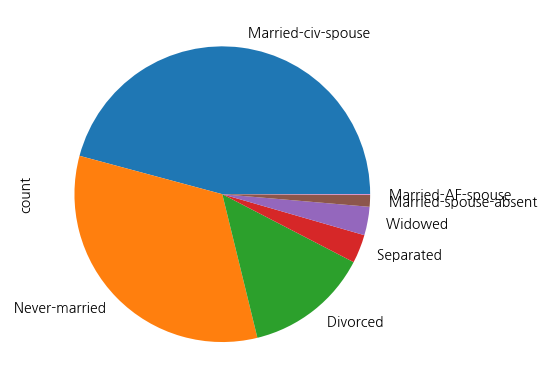

In [83]:
not_sg = data[data['marital-status']==' Married-civ-spouse']
data['marital-status']==''
data['marital-status']==''
data['marital-status']==''




In [112]:
data['race'].unique()

array([' Black', ' White', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [113]:
data[data['native-country']==' South']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,edu_times,marry
377,24,Private,HS-grad,9,Never-married,Exec-managerial,Own-child,Asian-Pac-Islander,Female,0,0,40,South,<=50K,under 12years,Never-married
746,30,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Own-child,Asian-Pac-Islander,Male,0,0,60,South,<=50K,under 12years,Married-civ-spouse
1303,21,Private,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,34,South,<=50K,under 12years,Never-married
1438,19,NaN,Some-college,10,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,2,South,<=50K,under 12years,Never-married
1875,28,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,50,South,>50K,13~16,Never-married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45769,36,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,Asian-Pac-Islander,Male,0,0,70,South,<=50K,under 12years,Never-married
46628,39,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,South,<=50K,13~16,Married-civ-spouse
46814,50,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,60,South,<=50K,under 12years,Married-civ-spouse
47583,60,Private,Masters,14,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,50,South,>50K,13~16,Married-civ-spouse


In [ ]:
data.describe() # 여기에 class도 나올수 있게.
data['caplital_gain'].value_counts()
# 투자소득이 없는 경우가 많아서 IQR 계산도 어렵다
# 이상값 없다
# 근무시간, 투자소득이나 투자손해나 모두 이상값 없다



EDA 할때 범주형 카테고리형 분리하기
obj_cols=
num_cols= 따로 저장
하나씩 찍어보기 힘드니까 반복문 사용

data.select_dtypes(include='object') ex로만 바꾸면 됨

반복문에 변수명 하나씩 넣어서 내용물 찍어보도록

- 유니크가 컬럼마다 몇개인지 알려면


for col in obj_cols:
    print(obj_cols[col].value_counts())
    
학력 별 소득 5만이상을 가져오려면?

tatio_result=
X = pd.get_dummies(data_set1,drop_first=True)
y= data['class']

# 하이퍼파라미터튜닝 <br> 모델성능개선
지니지수(크리테리언) 분류 알고리즘이 하이퍼파라미터안에있음 깊이도 최종적으로 도달할때까지 질문을 던지는데 의사결정나무의 과적합을 피하기 위한 max_depth(깊이라고하는 질문 수 제한) ccp_alpha는 가지치기. 

In [119]:
for i in range(1,11): # 1부터 11까지
    dtc= DecisionTreeClassifier(max_depth=10, random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print("="*30, f"max_depth: {i}", "="*30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

NameError: name 'X_train' is not defined

# 의사결정나무 시각화

In [115]:
from sklearn.tree import plot_tree

In [118]:
plt.figure(figsize=(20,20))
plot_tree(dtc, feature_names=dtc.feature_names_in_, max_depth=3- 7 fontsize=15, filled=True)
plt.show()

NameError: name 'dtc' is not defined

<Figure size 2000x2000 with 0 Axes>